In [57]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras import losses

In [60]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_val , y_val    = X_train[50000:60000, :], y_train[50000:60000]
X_train, y_train = X_train[:50000, :], y_train[:50000]

print(X_train.shape)
print(X_val.shape)

(50000, 28, 28)
(10000, 28, 28)


Dữ liệu input cho mô hình convolutional neural network là 1 tensor 4 chiều (N, W, H, D), trong bài này là ảnh xám nên W = H = 28, D = 1, N là số lượng ảnh cho mỗi lần training. Do dữ liệu ảnh ở trên có kích thước là (N, 28, 28) tức là (N, W, H) nên rần reshape lại thành kích thước N 28 28 * 1 để giống kích thước mà keras yêu cầu.

In [61]:
# Reshape hình dạng theo đúng kích thước mà keras yêu cầu : 4 chiều (N,W,H,D)
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_val   = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# One -hot coding nhãn y 
Y_train = keras.utils.to_categorical(y_train, 10)
Y_val   = keras.utils.to_categorical(y_val, 10)
Y_test  = keras.utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu: ', y_train[0])
print('Dữ liệu sau one-hot coding: ', Y_train[0])

Dữ liệu y ban đầu:  5
Dữ liệu sau one-hot coding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



# Bước này định nghĩa model:

0. Model = Sequential() để nói cho keras là ta sẽ xếp các layer lên nhau để tạo model. Ví dụ input -> CONV -> POOL -> CONV -> POOL -> FLATTEN -> FC -> OUTPUT
1. Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D), ta dùng ảnh xám kích thước (28,28) nên input_shape = (28, 28, 1)
2. Khi thêm Convolutional Layer ta cần chỉ rõ các tham số: K (số lượng layer), kernel size (W, H), hàm activation sử dụng. cấu trúc: model.add(Conv2D(K, (W, H), activation='tên_hàm_activation'))
3. Khi thêm Maxpooling Layer cần chỉ rõ size của kernel, model.add(MaxPooling2D(pool_size=(W, H)))
4. Bước Flatten chuyển từ tensor sang vector chỉ cần thêm flatten layer.
5. Để thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation sử dụng trong layer, cấu trúc: model.add(Dense(số_lượng_node activation='tên_hàm activation'))

In [62]:
# Định nghĩa model
model = Sequential()
# thêm convolution layer (số layer k=32, (w,h)=(3,3), activation ='sigmoid')
model.add(Conv2D(32, (3,3), activation ='sigmoid', input_shape =(28,28,1)))
# thêm conv layer thứ 2
model.add(Conv2D(32, (3,3), activation ='sigmoid'))
# thêm layer 3: max pooling
model.add(MaxPooling2D(pool_size= (2,2)))
# thêm flattern
model.add(Flatten())
# thêm fully connect layer 1 : 128 node
model.add(Dense(128, activation ='sigmoid'))
# thêm FC 2 : 10 node ouput
model.add(Dense(10, activation = 'softmax'))

In [63]:
#  compile: chỉ rõ hàm mất mát loss function, optimizer =? (SGD, 'adam',...), metrics = ['?']
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [83]:
# Thực hiện train với model data
M = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size =32, epochs =10, verbose =1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.0028 - acc: 0.9994 - val_loss: 0.0473 - val_acc: 0.9883
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.0031 - acc: 0.9993 - val_loss: 0.0424 - val_acc: 0.9901
Epoch 3/10
50000/50000 [==============================] - 82s 2ms/sample - loss: 0.0031 - acc: 0.9991 - val_loss: 0.0453 - val_acc: 0.9884
Epoch 4/10
50000/50000 [==============================] - 71s 1ms/sample - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0411 - val_acc: 0.9901
Epoch 5/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.0028 - acc: 0.9991 - val_loss: 0.0477 - val_acc: 0.9883
Epoch 6/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0413 - val_acc: 0.9906
Epoch 7/10
50000/50000 [==============================] - 70s 1ms/sample - loss: 0.0011 - acc: 0.9997 - val_loss: 0.

In [87]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 600,810
Trainable params: 600,810
Non-trainable params: 0
_________________________________________________________________


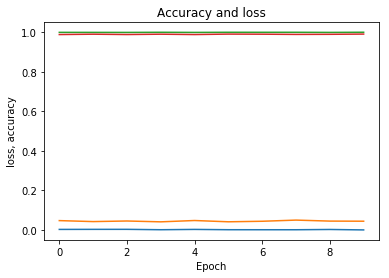

In [84]:
# Vẽ đồ thị hàm mất mát loss, và accuracy 
num_epochs = 10
import matplotlib.pyplot as plt

plt.plot(np.arange(0,num_epochs), M.history['loss'], label ='loss training')
plt.plot(np.arange(0,num_epochs), M.history['val_loss'], label ='loss validation')
plt.plot(np.arange(0,num_epochs), M.history['acc'], label ='accuracy of training')
plt.plot(np.arange(0,num_epochs), M.history['val_acc'], label ='accuracy of validation')
plt.title('Accuracy and loss')
plt.xlabel('Epoch')
plt.ylabel('loss, accuracy')
plt.show()

In [85]:
# Đánh giá mô hình đối với dữ liệu test
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 4s 415us/sample - loss: 0.0392 - acc: 0.9903


[0.03920860736566594, 0.9903]

 class of Xtest[2] la:  1


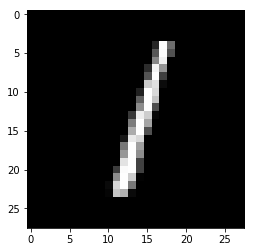

In [86]:
# Dùng mô hình để dự đoán X_test[1]
plt.imshow(X_test[2].reshape(28, 28), cmap ='gray')
y_pred = model.predict(X_test[2].reshape(1,28,28,1))
print(' class of Xtest[2] la: ', np.argmax(y_pred))

# Lưu model lại để sau chỉ cần mở file model_train
không cần train lại từ đầu

du doan tu model load lai:  7


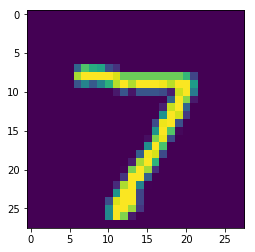

In [96]:
model.save('model_train_mnist.h5')

# Load model mà không cần train lại mô hình
from tensorflow.keras.models import load_model

model_load = load_model('model_train_mnist.h5')
y_predict = model_load.predict(X_test[0].reshape(1,28,28,1))
print('du doan tu model load lai: ', np.argmax(y_predict))
plt.imshow(X_test[0].reshape(28,28))